任何 数据分析和预测建模任务的 【第一步】，是数据探索。即使已有了很多数据，脑子里有无数设想，迫不及待想去求解，但开始严谨的分析之前，数据探索非常重要。

探索从很多简单的问题开始：数据（分布）形式、数据品质，再渐渐深入。
问题蓝图将随之清晰，变量的重要层次有所了解，进而指导之后的数据准备工作。

# 从哪里开始：拿到一个新数据集时，该考虑哪些问题？
以下探索Titanic 数据集

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

## 第一步：阅读数据，观察数据维度、变量类型、变量个数、（单列或全部）统计概要、缺失值

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 第二步：初探之后，问自己的几个问题：
1. 约减变量——是否需要所有变量 ？
2. 转换变量**transform** ？
3. 处理缺失值、异常值 ？
4. 创建变量，派生新的变量 ？

### 1.约减变量？
处理任何数据集的第一步，就是约减非必要的变量。这可以减少模型复杂度，加快计算。

是否要约删某个变量，取决于【数据集大小】和你的【目标】。像Titanic 这样比较小的数据集，从计算量角度看，不约减也没问题。但约减可能有助于提高准确性，毕竟有些变量对目标是负面影响。

比如PassengerId 可以删掉；描述特征的数值变量和分类变量可以保留；一些意义不明显得变量则继续探索，比如 Name, Ticket, Cabin

#### 探索Name

In [18]:
# str
# sorted
# unique

sorted(train["Name"])[0:15]   # Check the first 15 sorted names

['Abbing, Mr. Anthony',
 'Abbott, Mr. Rossmore Edward',
 'Abbott, Mrs. Stanton (Rosa Hunt)',
 'Abelson, Mr. Samuel',
 'Abelson, Mrs. Samuel (Hannah Wizosky)',
 'Adahl, Mr. Mauritz Nils Martin',
 'Adams, Mr. John',
 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
 'Aks, Mrs. Sam (Leah Rosen)',
 'Albimona, Mr. Nassef Cassem',
 'Alexander, Mr. William',
 'Alhomaki, Mr. Ilmari Rudolf',
 'Ali, Mr. Ahmed',
 'Ali, Mr. William',
 'Allen, Miss. Elisabeth Walton']

In [20]:
train.Name.describe()   

count                                891
unique                               891
top       Ostby, Mr. Engelhart Cornelius
freq                                   1
Name: Name, dtype: object

891行，891个唯一值。注意唯一性unique。

可以从姓氏last name 推断家庭关系，已婚女性可能在名字中插入婚前姓；

In [23]:
# Ticket
sorted(train['Ticket'][0:15])

['113783',
 '113803',
 '17463',
 '237736',
 '330877',
 '347082',
 '347742',
 '349909',
 '350406',
 '373450',
 'A/5 21171',
 'A/5. 2151',
 'PC 17599',
 'PP 9549',
 'STON/O2. 3101282']

In [24]:
train.Ticket.describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

这里有非缺失值891个，

unique value 681个，

出现最多的项为 ’347082‘，频数为7.

分类变量含有太多unique level，如每个记录一个level，那就无法通过【有限的唯一性】约减，归纳特征，对预测没什么帮助。这里从逻辑上看不出有什么规律，可以删除Ticket。（也有人可以从票据上挖掘出一些有用的信息，比如票价、VIP）

In [31]:
train.Ticket.value_counts()[0:10]

347082          7
CA. 2343        7
1601            7
CA 2144         6
347088          6
3101295         6
S.O.C. 14879    5
382652          5
113781          4
4133            4
Name: Ticket, dtype: int64

In [25]:
#Cabin
train['Cabin'][0:15]

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object

In [26]:
train.Cabin.describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [32]:
train.Cabin.value_counts()[:10]

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
F2             3
F33            3
D              3
C22 C26        3
D35            2
B77            2
Name: Cabin, dtype: int64

可以看出：Cabin的结构是 大写字母+数字。也许可以提取字母，约减levels。

### **“从简单出发”，这是最容易启动的方式。别害怕删掉一些意味复杂的变量，那只是暂时的。**

### **数据分析是一个迭代的动态过程：先只用少数几个变量，从简单的分析、模型入手，run起来；再扩展，加入越来越多的变量，使得越来越准确。**

### 2. 转换变量**transform**

主要是转换成数值变量。

一些dtypes，如这里的’object‘，非数值，也非category的变量，通过get_dummies(),其实处理后可以直接转换成数值的；

不必中间过程用pd.Categorical特意区分出来

In [35]:
#Pclass
new_Pclass=pd.Categorical(train.Pclass,   # dtype 转换为 category
               ordered=True)  # 一等舱高于二等舱，但转换成数值则1 < 2，所以有ordered=True

In [37]:
new_Pclass=new_Pclass.rename_categories(['Class1','Class2','Class3'])

In [51]:
print(train.Pclass.dtypes)
print(new_Pclass.dtype)

int64
category


In [39]:
# Cabin
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [41]:
char_cabin=train.Cabin.astype(str)

new_cabin=np.array([i[0] for i in char_cabin])

new_cabin=pd.Categorical(new_cabin) 
new_cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


成功将Cabin压缩为少数几个大类

In [42]:
train['Cabin']=new_cabin

In [46]:
train.Cabin.dtypes

category

### 3.缺失值、异常值处理

In [54]:
# 检测缺失值isnull()
train.isnull().sum()    # 计算占比可用 sum/count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [59]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

通过describe()也可以看出缺失值，因为它只会统计非缺失值。这里总共714，而总人数为891

#### 看看缺失值在哪些行：np.where()

In [60]:
missing=np.where(train.Age.isnull())

In [61]:
missing

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888]),)

In [62]:
len(missing[0])

177

如何处理缺失值？一般不建议删掉。
1. 用一些不影响算法的无意义的值填充，如0，-1，999
2. 用样本中心值，如均值、中位数填充（但得确认样本的分布情况，确保可以用样本来估计总体）
3. 通过已知的相关变量 进行估计、填充
4. 将数据集拆成2部分，含缺失值的，和不含缺失值的

#### 探索年龄分布

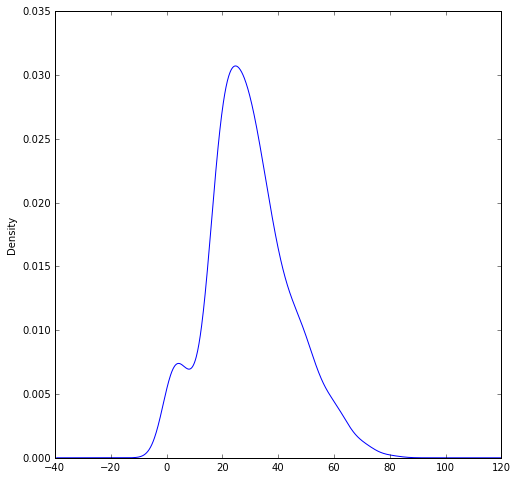

In [7]:
train.Age.plot(kind='density',
               figsize=(8,8))    

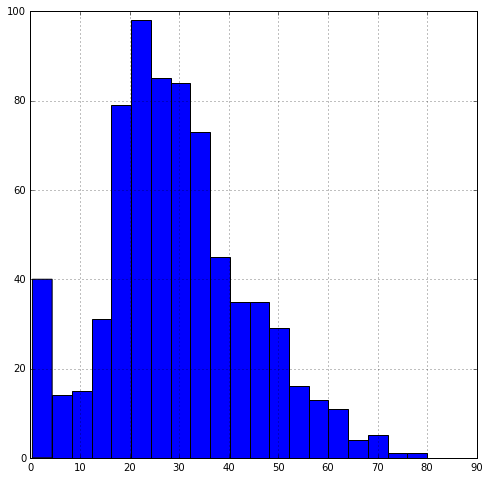

In [8]:
train.Age.hist(figsize=(8,8),
              bins=20)

##### 直觉地，探索年龄变量：可能年龄与生还存在相关性，比如老人与小孩会得到照顾？

In [65]:
gb_survived = train.groupby('Survived')  # groupby

In [63]:
Age_S1=train['Age'][train.Survived==1]

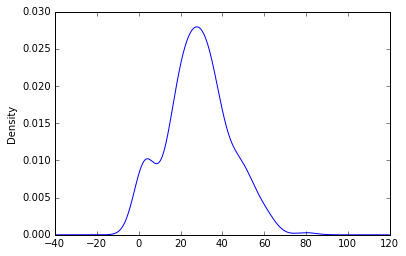

In [64]:
Age_S1.plot(kind='density')

Survived
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: Age, dtype: object

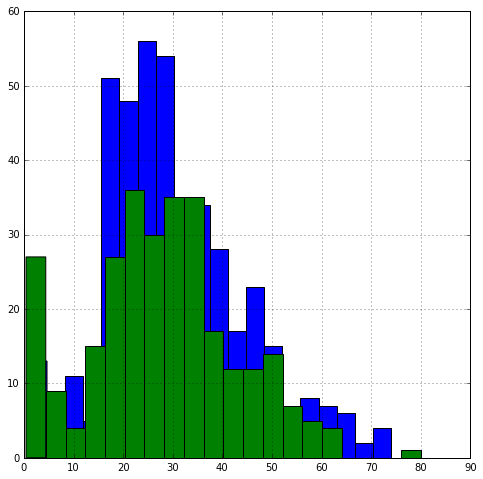

In [66]:
gb_survived.Age.hist(figsize=(8,8),bins=20) #直方图。条形图是对类别变量计数，bin是类别；
                                             #我们需要的bin是年龄的数值区间，而不是每个年龄作为一个类单独一组（会有几百组）

Survived
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: Age, dtype: object

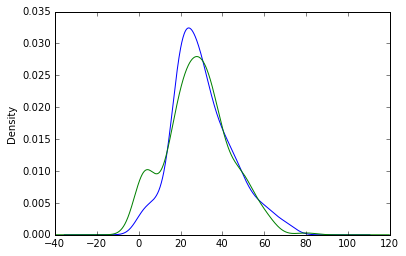

In [67]:
gb_survived.Age.plot(kind='density')

### 结论：貌似生还者和罹难者的年龄分布差不多，没有特别显示生还者中小孩或老人多些，反而二三十岁的人最多。因此，若用年龄均值或中位数填充缺失值(177个，约占1/5），反而可能误导预测。

最好能通过其他变量估计 年龄缺失值 再填充。比如通过Fare,Name：小孩可能不怎么会付小费，也不会被称呼“太太”

#### 异常值处理

画图是检测异常值的快捷方法

#### 探索Fare变量：可能越阔气的人，越可能生还

In [14]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

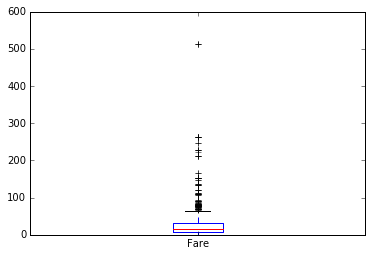

In [15]:
# train.Fare.boxplot()  报错：'Series' object has no attribute 'boxplot'
train.Fare.plot(kind='box')  # 用.plot() 只能画一个变量，下面的.boxplot(column=[])可以同时画多个变量

In [28]:
import seaborn as sns

/Users/mac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x118c0d438>,
 'caps': [<matplotlib.lines.Line2D at 0x118c14e80>,
 'fliers': [<matplotlib.lines.Line2D at 0x118c1e7f0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x118c19860>,
 'whiskers': [<matplotlib.lines.Line2D at 0x118c0de80>,
  <matplotlib.lines.Line2D at 0x118c229e8>]}

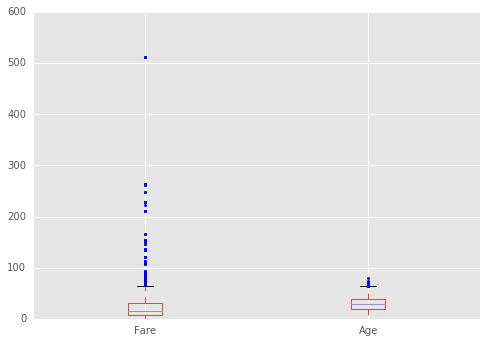

In [34]:
train.boxplot(column=['Fare','Age'],figsize=(10,10),sym='k.')  # 如果导入了seaborn，需要加参数sym='k.'。否则异常值不会显示

Fare中存在异常值，但要注意这个异常值不一定是一个，可能是很多个重叠在一个点：

In [32]:
index = np.where(train['Fare']==max(train.Fare)) 

# np.where(condition):If only `condition` is given, return ``condition.nonzero()``.
# np.nonzero(a):Return the indices of the elements that are non-zero.

In [43]:
train.loc[index] #根据行名取整行，

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


检测出异常值后，如同处理NA值一样，有多种方式可以考虑。下面先剔除，避免影响后续探索过程的直观发现：

In [56]:
non_index=np.where(train['Fare'] != max(train.Fare))
new_Fare=train.loc[non_index]

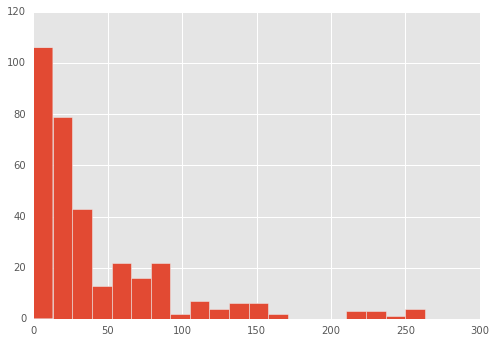

In [59]:
S_Fare=new_Fare['Fare'][new_Fare.Survived==1]
D_Fare=new_Fare['Fare'][new_Fare.Survived==0]
gb_Survived=new_Fare.groupby('Survived')
S_Fare.hist(bins=20)

Survived
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: Fare, dtype: object

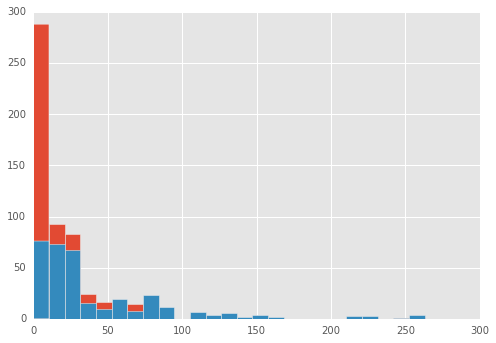

In [65]:
gb_Survived.Fare.hist(bins=25)

Survived
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: Fare, dtype: object

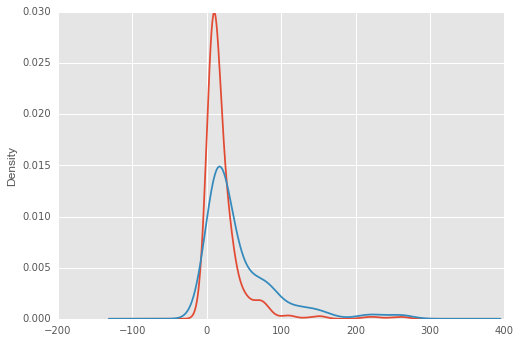

In [60]:
gb_Survived.Fare.plot(kind='density')

看不出Fare与生还率的关系，25%分位内的人生还最多，也死亡最多。猜测：小费付多少是有约定俗成的额度范围的，所有人都习惯按这个额度付。也许可以排除整个Fare变量

## 再来看看Age 与 Fare

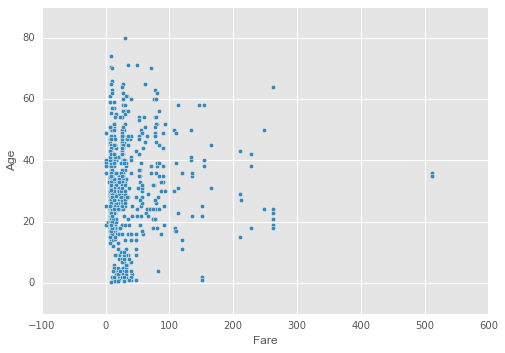

In [67]:
# 两个都是数值变量，试用散点图
train.plot(kind='scatter',  
           x='Fare',
           y='Age')

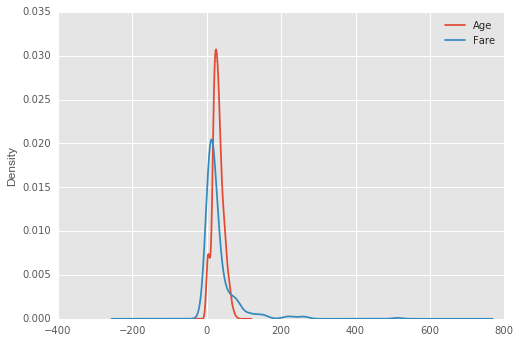

In [72]:
train[['Age','Fare']].plot(kind='density')   # df.plot()  ,注意前面的df，画的对象是df里的column，所以想画什么，就取什么列；
                                             # 参数subplots = True 则不再放一个图里

In [80]:
Age_null=train[train.Age.isnull()]

In [81]:
Age_nnull=train[train.Age.notnull()]

In [102]:
Age_sorted=Age_nnull.sort(columns='Age') 

Age_sorted.head(10) 

# 年龄排序，观察发现年龄数值小的，名字中含有Master 或Miss;大人名字里，多含有Mr,Mrs的称呼

/Users/mac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S


### 4.创建新的变量

方式有加减乘除

In [69]:
train["Family"] = train["SibSp"] + train["Parch"]

# 以上是初步探索，接下来是Titanic案例的完整过程：


选定用于预测的变量为Name,Sex,Age,SibSp,Parch,Pclass,(Fare)，
数据处理过程：
1. 合并train,test，方便同时预处理，最后在拆分
2. Name类别变量，拆分字符，取中间的称谓Master/Miss/Mr/Mrs，再哑变量转换为数值变量
3. 合并SibSp,Parch 为Family
4. 填充Embarked 缺失值
5. 用Fare/Family/Name(哑变量）对年龄缺失值进行预测、填充

In [106]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [109]:
train['id']='train'
test['id']='test'

In [110]:
df=pd.concat([train,test],ignore_index=True,axis=0)

In [111]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,id
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,train
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,train
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,train
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,train
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,train


In [120]:
df=df.drop(['Cabin','PassengerId','Ticket'],axis=1)

In [122]:
df=df.drop('Embarked',axis=1)

In [123]:
df.head()

,Age,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,id
0,22.0,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,train
1,38.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,train
2,26.0,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,train
3,35.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,train
4,35.0,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,train


In [125]:
df['Family']=df['SibSp']+df['Parch']

In [126]:
df=df.drop(['Parch','SibSp'],axis=1)

In [128]:
import re

In [183]:
df['Title'] = df['Name'].map(lambda x: re.compile(", (.*?)\.").findall(x)[0])

In [185]:
df=df.drop(['Name','Names'],axis=1)

In [192]:
df=df.drop('Fare',axis=1)

In [194]:
df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [195]:
df['Title'][df.Title == 'Jonkheer'] = 'Master'
df['Title'][df.Title.isin(['Ms','Mlle'])] = 'Miss'
df['Title'][df.Title == 'Mme'] = 'Mrs'
df['Title'][df.Title.isin(['Capt', 'Don', 'Major', 'Col', 'Sir'])] = 'Sir'
df['Title'][df.Title.isin(['Dona', 'Lady', 'the Countess'])] = 'Lady'

/Users/mac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/mac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/mac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/mac/anaconda/lib/python3.5/site-pa

In [196]:
df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Sir', 'Rev', 'Dr', 'Lady'], dtype=object)

In [197]:
df.head()

,Age,Pclass,Sex,Survived,id,Family,Title
0,22.0,3,male,0.0,train,1,Mr
1,38.0,1,female,1.0,train,1,Mrs
2,26.0,3,female,1.0,train,0,Miss
3,35.0,1,female,1.0,train,1,Mrs
4,35.0,3,male,0.0,train,0,Mr


In [206]:
df=pd.get_dummies(df,columns=['Sex','Title'])

In [207]:
Age_know=df[df.Age.notnull()]
Age_unknow=df[df.Age.isnull()]

In [208]:
Age_know.head()

,Age,Pclass,Survived,id,Family,Sex_female,Sex_male,Title_Dr,Title_Lady,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Title_Sir
0,22.0,3,0.0,train,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,38.0,1,1.0,train,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,26.0,3,1.0,train,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,35.0,1,1.0,train,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,35.0,3,0.0,train,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [209]:
Age_train=Age_know.drop(['Age','Survived','id'],axis=1)
Age_target=Age_know['Age']

In [222]:
Age_train=Age_train.astype('float64')

In [237]:
from sklearn.ensemble import RandomForestRegressor

In [238]:
RFR=RandomForestRegressor()

In [229]:
X=Age_train.values
y=Age_target.values

In [239]:
RFR.fit(Age_train,Age_target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [248]:
age_pred=Age_unknow.drop(['Age','Survived','id'],axis=1)

In [250]:
pred=RFR.predict(age_pred)

In [256]:
df['Age'][df.Age.isnull()]=pred

/Users/mac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [258]:
df.isnull().sum()

Age               0
Pclass            0
Survived        418
id                0
Family            0
Sex_female        0
Sex_male          0
Title_Dr          0
Title_Lady        0
Title_Master      0
Title_Miss        0
Title_Mr          0
Title_Mrs         0
Title_Rev         0
Title_Sir         0
dtype: int64

In [259]:
df_train=df[df['id']=='train']
df_test=df[df['id']=='test']

In [283]:
X_train=df_train.drop(['Survived','id',axis=1)
X_test=df_test.drop('id',axis=1)

SyntaxError: invalid syntax (<ipython-input-283-5ae388f6a6ef>, line 1)

In [270]:
y_train=train.Survived

In [271]:
from sklearn.ensemble import RandomForestClassifier

In [272]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [287]:
prediction=clf.predict(X_test.drop(['Survived'],axis=1))

In [288]:
submission=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':prediction})

In [290]:
submission.to_csv('mine2.csv',index=False)

### 其他操作：根据dtypes筛选列：

In [14]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# 筛出所有分类变量
categorical = train.dtypes[train.dtypes=='object']  # train.dtypes=='object' 返回的是pd.Series,再在Series里取

In [10]:
categorical   # 列名现在为index

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [12]:
train_categorical=train[categorical.index]  

In [13]:
train_categorical.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [15]:
# 筛出所有数值变量
train_numeric= train.drop(train_categorical,axis=1) 

In [16]:
train_categorical.describe()   # 统计分类变量

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ostby, Mr. Engelhart Cornelius",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


pd.Categorical?

In [30]:
new_Pclass = pd.Categorical(train["Pclass"],
                           ordered=False)

In [32]:
new_Pclass.describe()

,counts,freqs
categories,,
1,216,0.242424
2,184,0.206510
3,491,0.551066
